In [2]:
import sqlalchemy as sa
import pandas as pd
import numpy as np
import requests
import json

In [3]:
#Personal Database Credentials
my_db_secret = {
    'drivername': 'postgresql+psycopg2', 
    'host': 'mmai5100postgres.canadacentral.cloudapp.azure.com',
    'port': '5432', 
    'username': 'sushmit9', 
    'password': '2023!Schulich',
    'database': 'sushmit9_db'
}

#Creating Databse URL
my_db_url = sa.engine.URL.create(
    drivername = my_db_secret['drivername'],
    username = my_db_secret['username'],
    password = my_db_secret['password'],
    host = my_db_secret['host'],
    port = my_db_secret['port'],
    database = my_db_secret['database'])

# Create the SQLAlchemy engine
my_db_engine = sa.create_engine(my_db_url)

#### PULLING DATA

In [4]:
resource_id = '775ca815-5028-4e9b-9dd4-6975ff1be021'
limit = 10000
api_url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id={}&limit={}'.format(resource_id, limit)
print(api_url)

https://data.ontario.ca/api/3/action/datastore_search?resource_id=775ca815-5028-4e9b-9dd4-6975ff1be021&limit=10000


In [5]:
response = requests.get(api_url)
data = response.json()  # Extract JSON data from the response
data

{'help': 'https://data.ontario.ca/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'limit': 10000,
  'records_format': 'objects',
  'resource_id': '775ca815-5028-4e9b-9dd4-6975ff1be021',
  'total_estimation_threshold': None,
  'records': [{'_id': 1,
    'Date': '2020-12-16T00:00:00',
    'Agegroup': '12-17yrs',
    'At least one dose_cumulative': '0',
    'Second_dose_cumulative': '0',
    'fully_vaccinated_cumulative': '0',
    'third_dose_cumulative': '0',
    'Total population': '961857',
    'Percent_at_least_one_dose': '.0000',
    'Percent_fully_vaccinated': '.0000',
    'Percent_3doses': '.0000'},
   {'_id': 2,
    'Date': '2020-12-16T00:00:00',
    'Agegroup': '18-29yrs',
    'At least one dose_cumulative': '37',
    'Second_dose_cumulative': '0',
    'fully_vaccinated_cumulative': '0',
    'third_dose_cumulative': '0',
    'Total population': '2454802',
    'Percent_at_least_one_dose': '.0000',
    'Percent_fully_vaccinated'

In [6]:
records = data['result']['records']
df = pd.DataFrame(records)
df.head()

,_id,Date,Agegroup,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,1,2020-12-16T00:00:00,12-17yrs,0,0,0,0,961857,.0000,.0000,.0000
1,2,2020-12-16T00:00:00,18-29yrs,37,0,0,0,2454802,.0000,.0000,.0000
2,3,2020-12-16T00:00:00,30-39yrs,84,0,0,0,2077137,.0000,.0000,.0000
3,4,2020-12-16T00:00:00,40-49yrs,98,0,0,0,1855340,.0001,.0000,.0000
4,5,2020-12-16T00:00:00,50-59yrs,148,0,0,0,2019276,.0001,.0000,.0000


In [97]:
# Convert numeric columns to integers
numeric_columns = ['fully_vaccinated_cumulative', 'At least one dose_cumulative']
df[numeric_columns] = df[numeric_columns].astype(int)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

# Group by 'Agegroup' and calculate the new doses for each group
df['New Doses on fully vaccinated'] = df.groupby('Agegroup')['fully_vaccinated_cumulative'].diff().fillna(0)
df['New Doses at least one dose'] = df.groupby('Agegroup')['At least one dose_cumulative'].diff().fillna(0)


# Rename columns
df.rename(columns={
    'Date': 'Reported Date',
    'Agegroup': 'Age Group'
}, inplace=True)

# Reorder columns
final_columns = [
    'Reported Date', 'Age Group', 
    'New Doses on fully vaccinated', 'New Doses at least one dose'
]
df = df[final_columns]



In [98]:
df.head(50)

,Reported Date,Age Group,New Doses on fully vaccinated,New Doses at least one dose
0,2020-12-16,12-17yrs,0.0,0.0
1,2020-12-16,18-29yrs,0.0,0.0
2,2020-12-16,30-39yrs,0.0,0.0
3,2020-12-16,40-49yrs,0.0,0.0
4,2020-12-16,50-59yrs,0.0,0.0
5,2020-12-16,60-69yrs,0.0,0.0
6,2020-12-16,70-79yrs,0.0,0.0
7,2020-12-16,80+,0.0,0.0
8,2020-12-16,Adults_18plus,0.0,0.0
9,2020-12-16,Ontario_12plus,0.0,0.0


In [99]:
df.dtypes

Reported Date                     object
Age Group                         object
New Doses on fully vaccinated    float64
New Doses at least one dose      float64
dtype: object

#### PUSING THE DATA

In [100]:
df.to_sql(
    name      = 'covid_on_vaccine_data',
    con       = my_db_engine,
    schema    = 'final_exam',
    if_exists = 'replace',
    index     = False,
    method    = 'multi',
    dtype     = {
        'Reported Date'                   : sa.types.VARCHAR(20),
        'Age Group'                       : sa.types.VARCHAR(255),
        'New Doses on fully vaccinated'   : sa.types.FLOAT,
        'New Doses at least one dose'     : sa.types.FLOAT,
    },
)

10000

Evidence
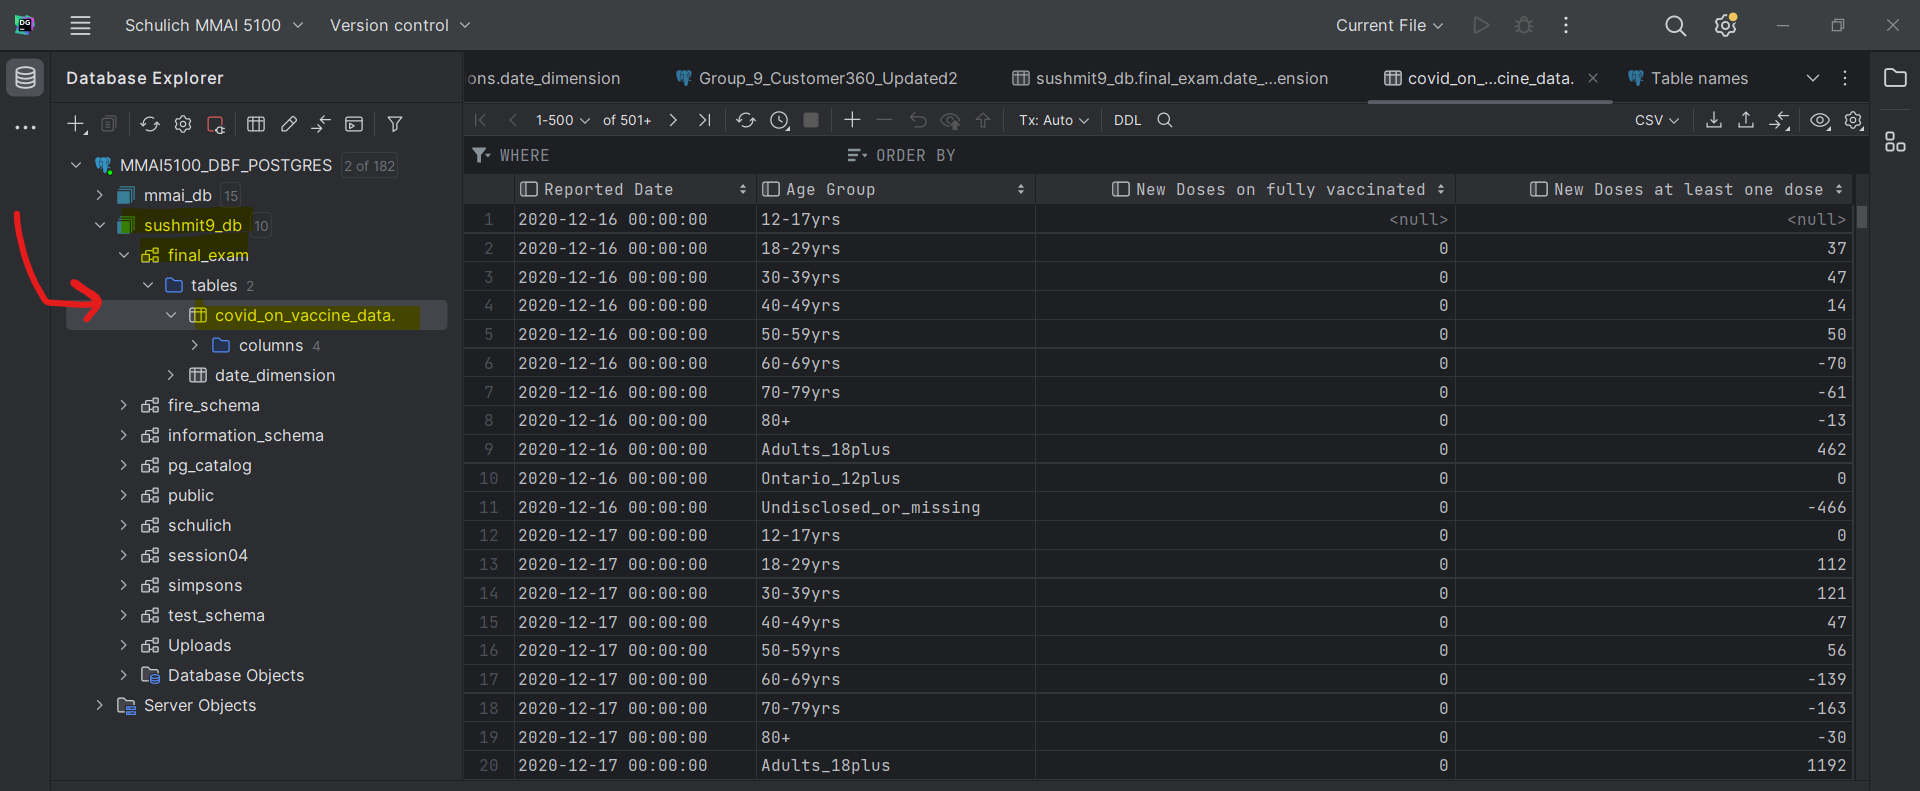